 # FashionMNIST

 ## Задание 7.2

<img src="https://emiliendupont.github.io/imgs/mnist-chicken/mnist-and-fashion-examples.png">

На практике построим нейронную сеть для классификации картиной. В качестве входных данных используются картинки одежды (в градациях серого, то есть цветовых каналов не 3, а 1). По входной картинке нужно предсказать тип одежды.

In [ ]:
# !pip install torchvision

import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision

Скачаем обучающую и контрольную выборки.

In [ ]:
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=None)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=None)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

#classes = (<перечислите классы как строки>)

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


Каждая картинка имеет класс от 0 до 9, расшифровка меток класса:  

|class_id|class_name|
|----|----|
|0| T-shirt/top|
|1| Trouser|
|2| Pullover|
|3| Dress|
|4| Coat|
|5| Sandal|
|6| Shirt|
|7| Sneaker|
|8| Bag|
|9| Ankle boot| 

In [ ]:
%tensorflow_version 1.x
# Импортируем сам keras
import keras
# Последовательный тип модели
from keras.models import Sequential
# Импортируем полносвязный слой, слои активации и слой, превращающий картинку в вектор
from keras.layers import Dense, Activation, Flatten
# Импортируем датасеты, чтобы вытащить оттуда нужные нам данные
import keras.datasets

import numpy as np
from matplotlib import pyplot as plt

# Эти библиотеки отключают лишние предупреждения от библиотек, в частности,
# tensorflow, чтобы не засорять вывод наших результатов
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False
import warnings
warnings.filterwarnings("ignore")

# keras является оболочкой для более низкоуровневых библиотек, 
# в нашем случае мы используем tensorflow, у которого на данный момент 
# поддерживаются две версии, установим первую
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

TensorFlow 1.x selected.


Using TensorFlow backend.


<h2 style="text-align: center;"><b>Задание</b></h2>

Посмотрите на датасет.
* Сколько картинок в train? В test?
* Равномерно ли распределено количество объектов разных классов в train датасете (это можно понять, поработав с полем `train_data` у переменной `trainset`)? в test?
* Выведите несколько картинок с помощью `pyplot`

Используя материалы семинаров по многослойным  и свёрточным сетям, напишите:
1.  Многослойную нейронную сеть MLP (Multi-Layer Perceptron) классифицирующую этот датасет
2. Свёрточную сеть, классифицирующую этот датасет
3. Сравните их качество (по графикам лосса и по Accuracy Score)

Если качество, которое получается у  нейросети, выше 95%, то Вы решили задачу с точностью, которую можно использовать в жизни.

In [ ]:
trainset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train

In [ ]:
testset

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test

In [ ]:
np.unique(trainset.targets, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [ ]:
np.unique(testset.targets, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))

In [ ]:
trainset.train_data.shape

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


torch.Size([60000, 28, 28])

In [ ]:
trainset.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


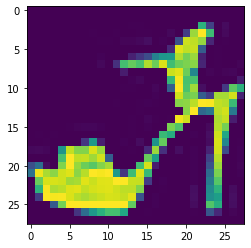

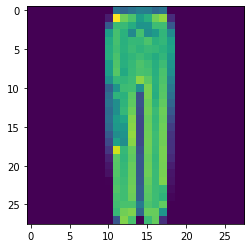

In [ ]:
plt.imshow(trainset.train_data[9])
plt.show()

plt.imshow(trainset.train_data[1000])
plt.show()

In [ ]:
X_train = trainset.train_data
y_train = trainset.targets

X_test = testset.train_data
y_test = testset.targets

In [ ]:
X_train = X_train/255
X_test = X_test/255

input_size = X_train[0].shape

In [ ]:
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)

In [ ]:
model = Sequential()

In [ ]:
model.add(Flatten(input_shape=input_size))

model.add(Dense(units=128, input_shape=input_size))

model.add(Activation('relu'))

model.add(Dense(units=10))

# softmax
model.add(Activation('softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size=1000, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.8647 - accuracy: 0.7156
Epoch 2/20
60000/60000 [==============================] - 1s 14us/step - loss: 0.5123 - accuracy: 0.8288
Epoch 3/20
60000/60000 [==============================] - 1s 14us/step - loss: 0.4609 - accuracy: 0.8444
Epoch 4/20
60000/60000 [==============================] - 1s 14us/step - loss: 0.4263 - accuracy: 0.8543
Epoch 5/20
60000/60000 [==============================] - 1s 14us/step - loss: 0.4022 - accuracy: 0.8625
Epoch 6/20
60000/60000 [==============================] - 1s 14us/step - loss: 0.3895 - accuracy: 0.8657
Epoch 7/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.3711 - accuracy: 0.8719
Epoch 8/20
60000/60000 [==============================] - 1s 14us/step - loss: 0.3610 - accuracy: 0.8747
Epoch 9/20
60000/60000 [==============================] - 1s 14us/step - loss: 0.3531 - accuracy: 0.8774
Epoch 10/20
60000/60000 [==============================

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.evaluate(X_test, y_test, batch_size=164)

10000/10000 [==============================] - 0s 17us/step


[0.3471910541713238, 0.8755999803543091]

In [ ]:
X_train, X_test = X_train.reshape((60000, 28, 28, 1)), X_test.reshape((10000, 28, 28, 1))
input_size = X_train[0].shape
print(input_size)

torch.Size([28, 28, 1])


In [ ]:
from keras.layers import Conv2D

In [ ]:
conv_model = Sequential()

In [ ]:
# В начале добавляем сверточный слой, первый параметр - количество фильров (24),
# второй - размер "ядра" - окошка, перемещающегося по входному изображению (3,3),
# padding - добавление пикселей по краям изображения, чтобы сделать свертку на 
# крайних пикселях, режим `same` - повторение края
conv_model.add(Conv2D(24, (3, 3), padding='same', input_shape=input_size))

conv_model.add(Activation('relu'))

conv_model.add(Flatten())

conv_model.add(Dense(64, activation='relu'))

conv_model.add(Dense(10, activation='softmax'))

In [ ]:
# При помощи метода `summary` мы можем посмотреть,как выглядит наша 
# итоговая архитектура нейросети и количество параметров (весов)
conv_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 24)        240       
_________________________________________________________________
activation_5 (Activation)    (None, 28, 28, 24)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 18816)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                1204288   
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 1,205,178
Trainable params: 1,205,178
Non-trainable params: 0
_________________________________________________________________


In [ ]:
conv_model.compile(loss='categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

In [ ]:
conv_model.fit(X_train, y_train, epochs=5, batch_size=100)

Epoch 1/5
60000/60000 [==============================] - 32s 536us/step - loss: 0.4309 - accuracy: 0.8490
Epoch 2/5
60000/60000 [==============================] - 32s 534us/step - loss: 0.2860 - accuracy: 0.8985
Epoch 3/5
60000/60000 [==============================] - 32s 533us/step - loss: 0.2369 - accuracy: 0.9138
Epoch 4/5
60000/60000 [==============================] - 32s 531us/step - loss: 0.2061 - accuracy: 0.9241
Epoch 5/5
60000/60000 [==============================] - 32s 532us/step - loss: 0.1784 - accuracy: 0.9349


In [ ]:
conv_model.evaluate(X_test, y_test)

10000/10000 [==============================] - 2s 211us/step


[0.28141424843072893, 0.901199996471405]

In [ ]:
# сверточная нейронная сеть имеет более высокую точность и более быструю сходимость
# при более низком количестве эпох (хотя тренировка в целом занимает больше времени из-за свертки)